[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']
Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


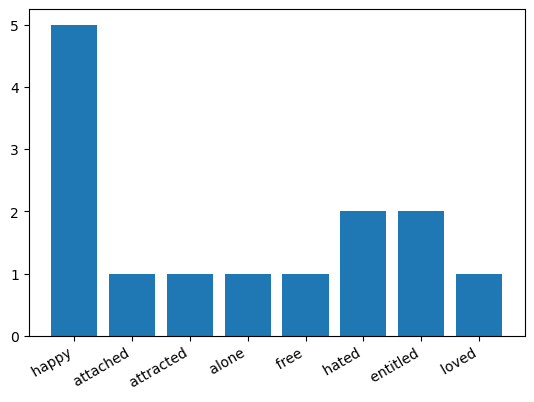

In [1]:
import string
from collections import Counter

import matplotlib.pyplot as plt

# reading text file
text = open("read.txt", encoding="utf-8").read()

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

# NLP Emotion Algorithm
# 1) Check if the word in the final word list is also present in emotion.txt
#  - open the emotion file
#  - Loop through each line and clear it
#  - Extract the word and emotion using split

# 2) If word is present -> Add the emotion to emotion_list
# 3) Finally count each emotion in the emotion list

emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in final_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)

# Plotting the emotions on the graph

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()


In [4]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = open('read.txt', encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")

# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)


def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")


sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\dante/nltk_data'
    - 'C:\\Users\\dante\\anaconda3\\nltk_data'
    - 'C:\\Users\\dante\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\dante\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\dante\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
